In [6]:
"""
Note: I've been trying out more QuTIP tutorials and lectures, but those have been pretty cluttered and not super
substantial, so I didn't upload them, but if you'd like to see those as well, I'd be happy to compile all of those
in a more organized fashion and upload those as well!
"""

from qutip import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import *

In [7]:
# In the RWA, terms in a Hamiltonian which oscillate rapidly are neglected. This is a valid approximation when the applied electromagnetic radiation is near resonance with an atomic transition, and the intensity is low.

# PARAMETERS, where h_bar = 1.0

wc = 1.0 * 2 * pi
wa = 1.0 * 2 * pi
g = 0.05 * 2 * pi
kappa = 0.005  # cavity dissipation rate
gamma = 0.05  # atom dissipation rate
N = 15  # number of cavity fock states
n_th_a = 0.0  # avg number of thermal bath excitation
use_rwa = True

tlist = np.linspace(0,25,101)

In [11]:
# initial state
psi0 = tensor(basis(N,0), basis(2,1))  # start with an excited atom
# fock state ket vector: basis(N,#m), #m = level containing excitation
# tensor product: tensor()

# operators
a = tensor(destroy(N), qeye(2))
# lowering (destruction) operator: destroy(N)
# identity: qeye(N)
sm = tensor(qeye(N), destroy(2))

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + ga * (a.dag() + a) * (sm + sm.dag())

In [9]:
# collapse operators that describe dissipation

c_ops = []

# cavity relaxation
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(sqrt(rate) * a)
    
# cavity excitation, if temperature > 0
rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(sqrt(rate) * a.dag())
    
# qubit relaxation
rate = gamma
if rate > 0.0:
    c_ops.append(sqrt(rate) * sm)

In [12]:
# evolve system, request that the expectation values of a.dag()*a and sm*sm.dag() are returned by the solver passing the list [a.dag()*a, sm.dag()*sm] as the fifth argument to the solver

output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm])

Text(0.5, 1.0, 'Vacuum Rabi Oscillations')

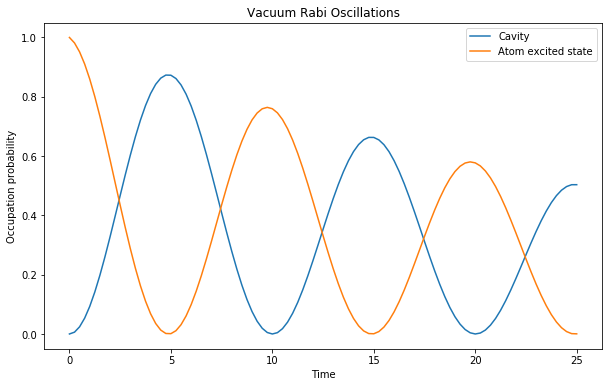

In [13]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1,1,figsize=(10,6))

axes.plot(tlist,n_c,label="Cavity")
axes.plot(tlist,n_a,label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel("Time")
axes.set_ylabel("Occupation probability")
axes.set_title("Vacuum Rabi Oscillations")

In [47]:
N = 10

wc = 5.0 * 2 * pi
wa = 3.0 * 2 * pi
w2 = 2.0 * 2 * pi

g = 0.01 * 2 * pi

tlist = np.linspace(0,100,500)

width = 0.5

# resonant SQRT iSWAP gate
T0 = 20
T_gate = (1*pi)/(4*g)

In [18]:
# cavity operators
a = tensor(destroy(N), qeye(2), qeye(2))
n = a.dag() * a

# operators for qubit
sm = tensor(qeye(N), destroy(2), qeye(2))
sz = tensor(qeye(N), sigmaz(), qeye(2))
n = sm.dag() * sm

In [19]:
# Hamiltonian

Hc = a.dag() * a
Ha = 0.5 * sz
Hca = g * (a.dag() * sm + a * sm.dag())

H = wc * Hc + wa * Ha + Hca

In [20]:
H

Quantum object: dims = [[10, 2, 2], [10, 2, 2]], shape = (40, 40), type = oper, isherm = True
Qobj data =
[[  9.42477796   0.           0.         ...   0.           0.
    0.        ]
 [  0.           9.42477796   0.         ...   0.           0.
    0.        ]
 [  0.           0.          -9.42477796 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 292.16811678   0.
    0.        ]
 [  0.           0.           0.         ...   0.         273.31856086
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  273.31856086]]

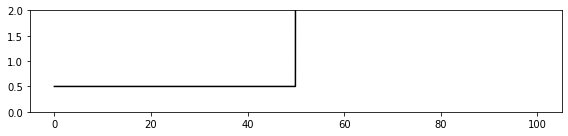

In [42]:
def step_t(wa, t0, width, t):
    return wa + (wc - wa) * (t > t0)

fig, axes = plt.subplots(1,1,figsize=(8,2))
axes.plot(tlist, [step_t(0.5, 50, 0.0, t) for t in tlist], 'k')
axes.set_ylim(0,2)
fig.tight_layout()

In [45]:
def wc_t(t, args=None):
    return wc

def wa_t(t, args=None):
    return wa + step_t(0.0, T0, width, t) - step_t(0.0, T0+T_gate,width,t)

H_t = [[Hc, wc_t],[Ha,wa_t],Hca]

In [46]:
res = mesolve(H_t, psi0, tlist, [], [])

ValueError: operands could not be broadcast together with shapes (40,) (30,) 